### **Import packages**

In [0]:
#import key packages

from matplotlib import pyplot as plt
import networkx as nx
import random
import numpy as np
random.seed(2021)
import scipy.stats as sts
from scipy.stats import norm
from copy import deepcopy
from tabulate import tabulate
days = 75

### **Reading the values file**

In [0]:
import os
# change directory here
os.chdir("/content/drive/My Drive/Minerva/CS166/CS166 Covid19")

full_tracks = np.load("CS166 FP tracks.npy")
full_tracks_hospital = np.load("CS166 FP tracks hospitals.npy")

### **Naming**

In [0]:
full_status = ["social_distancing = False, second_track = False, mass_testing = False",
               "social_distancing = False, second_track = False, mass_testing = True ",
               "social_distancing = False, second_track = True , mass_testing = False",
               "social_distancing = True , second_track = False, mass_testing = False",
               "social_distancing = False, second_track = True , mass_testing = True ",
               "social_distancing = True , second_track = False, mass_testing = True ",
               "social_distancing = True , second_track = True , mass_testing = False",
               "social_distancing = True , second_track = True , mass_testing = True "]

### **Visulize results**

#### **Visulize the pandemic progress: infected vs detected**

social_distancing = False, second_track = False, mass_testing = False


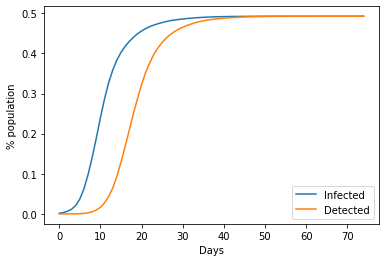

social_distancing = False, second_track = False, mass_testing = True 


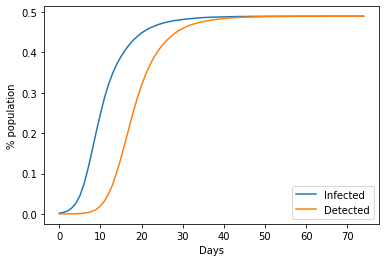

social_distancing = False, second_track = True , mass_testing = False


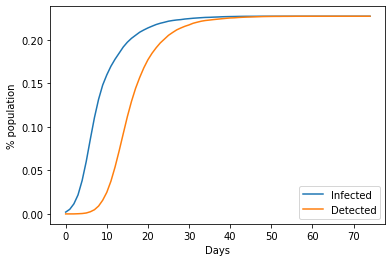

social_distancing = True , second_track = False, mass_testing = False


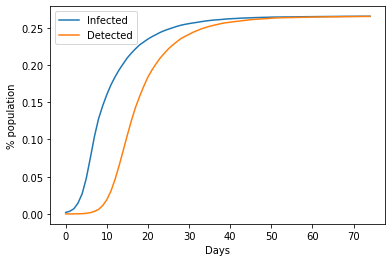

social_distancing = False, second_track = True , mass_testing = True 


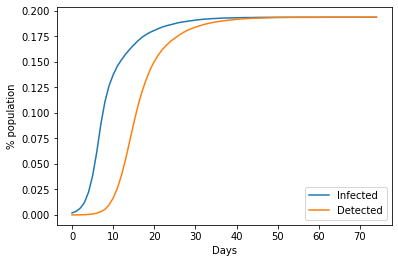

social_distancing = True , second_track = False, mass_testing = True 


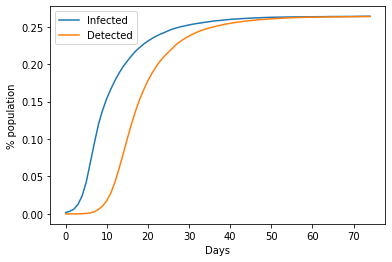

social_distancing = True , second_track = True , mass_testing = False


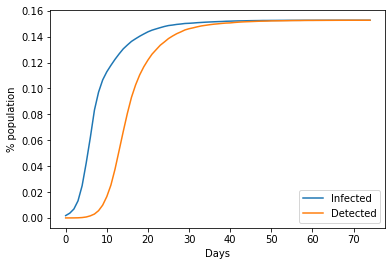

social_distancing = True , second_track = True , mass_testing = True 


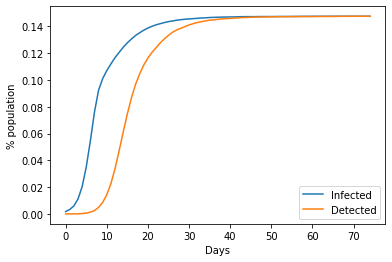

In [4]:
for i in range(8):
  print(full_status[i])
  #plt.figure(figsize = (6,6))
  plt.plot(range(days), np.mean(full_tracks[:,i], axis = 0), label = "Infected")
  plt.plot(range(days), np.mean(full_tracks_hospital[:,i], axis = 0), label = "Detected")
  plt.xlabel("Days")
  plt.ylabel("% population")
  plt.legend()
  plt.show()

#### **Visulize the pandemic progress: infected and its uncertainty**

social_distancing = False, second_track = False, mass_testing = False


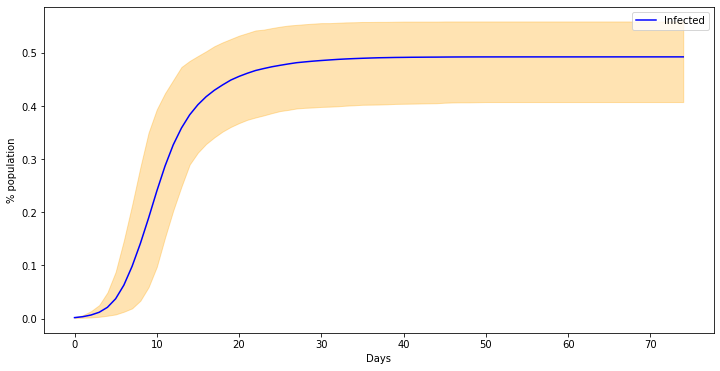

social_distancing = False, second_track = False, mass_testing = True 


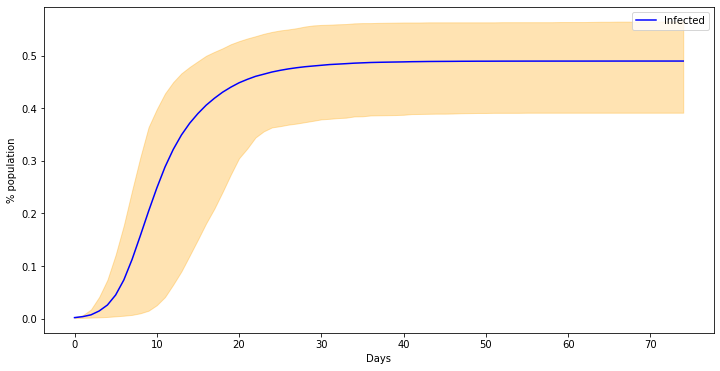

social_distancing = False, second_track = True , mass_testing = False


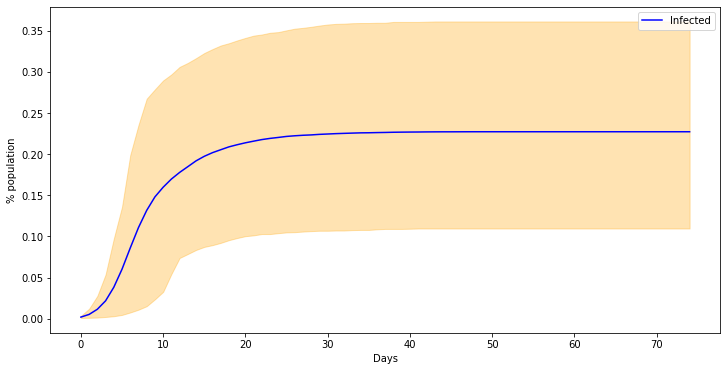

social_distancing = True , second_track = False, mass_testing = False


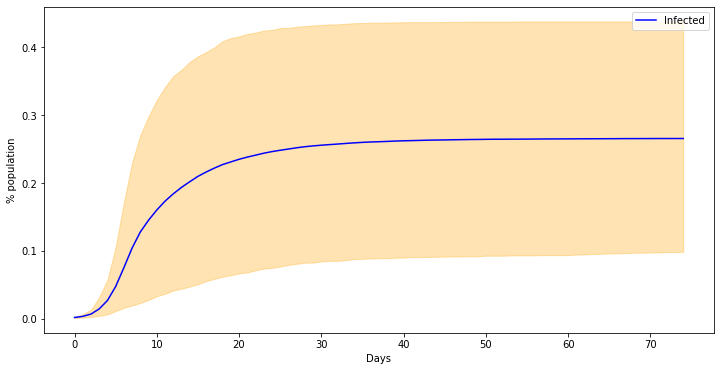

social_distancing = False, second_track = True , mass_testing = True 


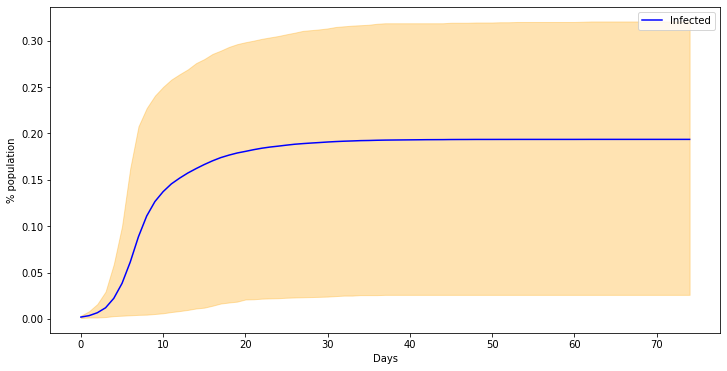

social_distancing = True , second_track = False, mass_testing = True 


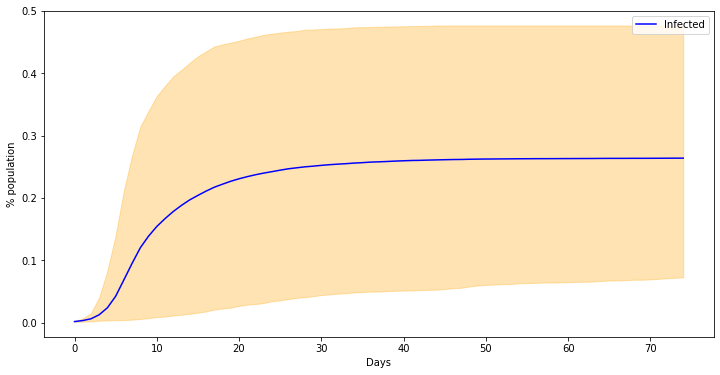

social_distancing = True , second_track = True , mass_testing = False


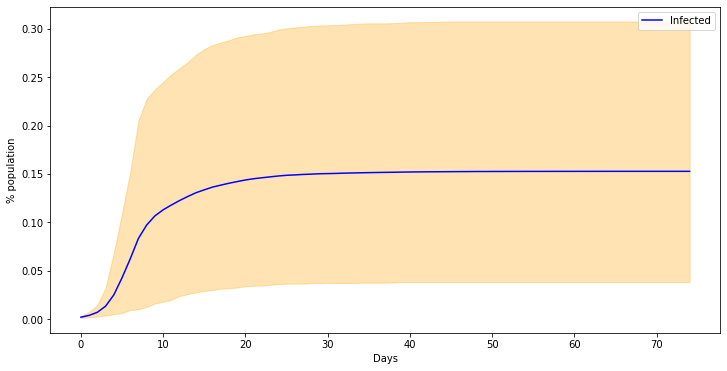

social_distancing = True , second_track = True , mass_testing = True 


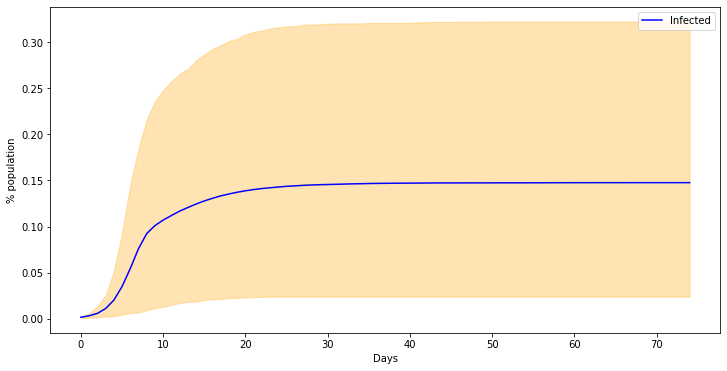

In [5]:
for i in range(8):
  print(full_status[i])
  plt.figure(figsize = (12,6))
  plt.plot(range(days), np.mean(full_tracks[:,i], axis = 0), label = "Infected", color = 'blue')
  x1 = np.quantile(full_tracks[:,i], 0.95, axis = 0)
  x2 = np.quantile(full_tracks[:,i], 0.05, axis = 0)
  plt.fill_between(list(range(days)), x1, x2,
                   facecolor="orange", # The fill color
                   color='orange',       # The outline color
                   alpha=0.3) 
  plt.xlabel("Days")
  plt.ylabel("% population")
  plt.legend()
  plt.show()

#### **Visulize the pandemic progress: detected and its uncertainty**

social_distancing = False, second_track = False, mass_testing = False


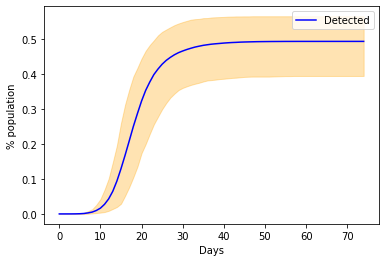

social_distancing = False, second_track = False, mass_testing = True 


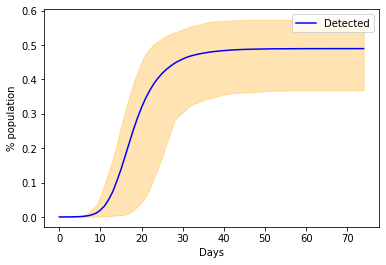

social_distancing = False, second_track = True , mass_testing = False


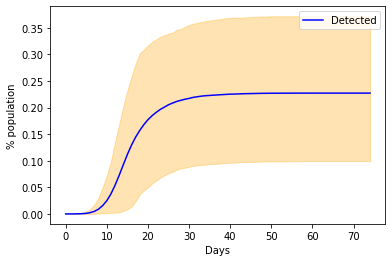

social_distancing = True , second_track = False, mass_testing = False


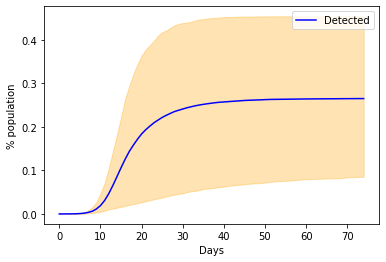

social_distancing = False, second_track = True , mass_testing = True 


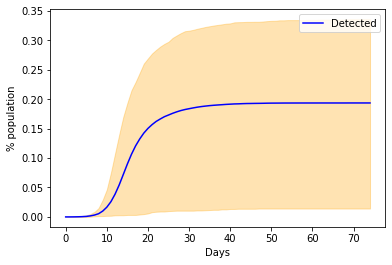

social_distancing = True , second_track = False, mass_testing = True 


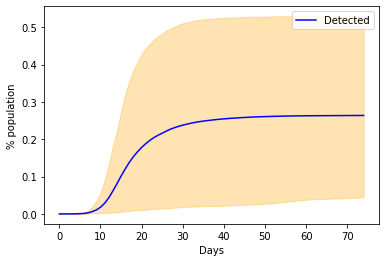

social_distancing = True , second_track = True , mass_testing = False


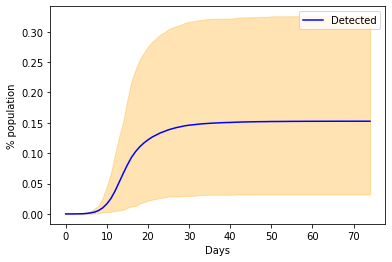

social_distancing = True , second_track = True , mass_testing = True 


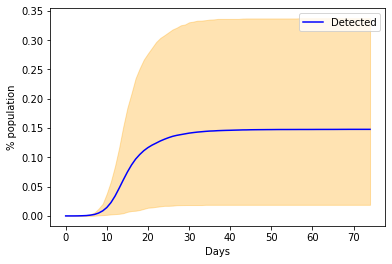

In [6]:
for i in range(8):
  print(full_status[i])
  #plt.figure(figsize = (12,6))
  plt.plot(range(days), np.mean(full_tracks_hospital[:,i], axis = 0), label = "Detected", color = 'blue')
  x1 = np.quantile(full_tracks_hospital[:,i], 0.975, axis = 0)
  x2 = np.quantile(full_tracks_hospital[:,i], 0.025, axis = 0)
  plt.fill_between(list(range(days)), x1, x2,
                   facecolor="orange", # The fill color
                   color='orange',       # The outline color
                   alpha=0.3) 
  plt.xlabel("Days")
  plt.ylabel("% population")
  plt.legend()
  plt.show()

#### **Visulize the histogram of final population infection level in different models**

Mean: 0.4925666666666667
95% confidence interval = [0.39382500000000004, 0.564325]


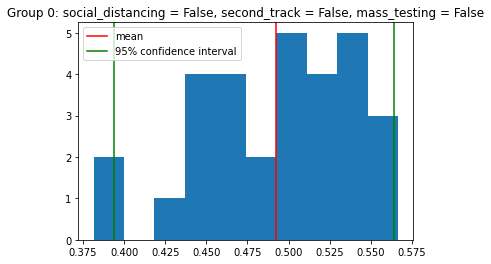


Mean: 0.4895166666666667
95% confidence interval = [0.36836250000000004, 0.5756249999999999]


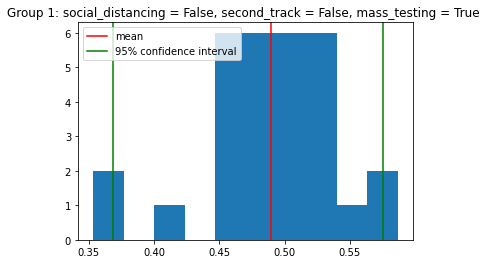


Mean: 0.22721666666666668
95% confidence interval = [0.099375, 0.37183749999999993]


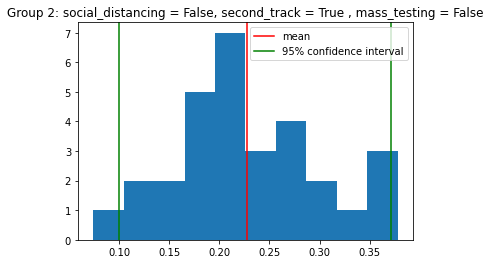


Mean: 0.26541666666666663
95% confidence interval = [0.08852499999999999, 0.45448749999999993]


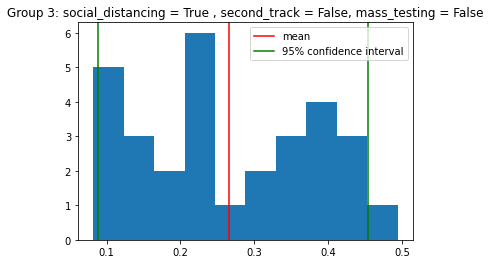


Mean: 0.1935666666666667
95% confidence interval = [0.0142375, 0.33576249999999996]


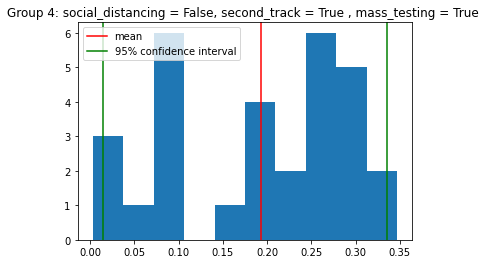


Mean: 0.2639666666666666
95% confidence interval = [0.051475, 0.5292374999999999]


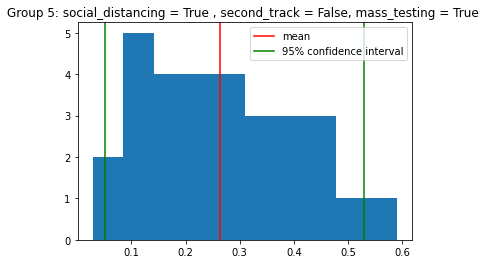


Mean: 0.15263333333333332
95% confidence interval = [0.032087500000000005, 0.32547499999999996]


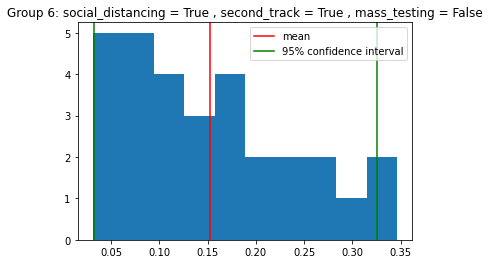


Mean: 0.14763333333333334
95% confidence interval = [0.018925, 0.33707499999999996]


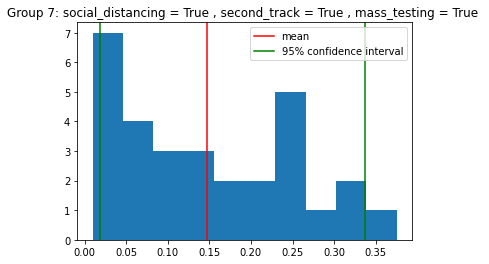

In [7]:
for i in range(8):
  results = [full_tracks[:,i][t][-1] for t in range(30)]
  mean = np.mean(results)
  median, i975, i025 = np.quantile(results, [0.5, 0.975, 0.025])
  print("Mean:", mean)
  print("95% confidence interval = [{}, {}]".format(i025, i975))
  plt.hist(results)
  plt.axvline(mean, color = "red", label = "mean")
  plt.axvline(i975, color = "green", label = "95% confidence interval")
  plt.axvline(i025, color = "green")
  plt.legend()
  plt.title("Group " + str(i) + ": " + full_status[i])
  plt.show()
  print("")
# Shade the area between y1 and line y=0
         # Transparency of the fill


### **Results & Significance analysis**

In [0]:
final_results = np.array([[full_tracks[:,i][t][-1] for t in range(30)] for i in range(8)])

#### **Reports: Mean, Median, and confidence interval**

In [0]:
report = [["Group " + str(i)] for i in range(8)]
total_mean = sorted([np.mean(final_results[i]) for i in range(8)])
for i in range(8):
  report[i].append(full_status[i][20:25])
  report[i].append(full_status[i][42:47])
  report[i].append(full_status[i][64:])
  report[i].append(np.mean(final_results[i]))
  report[i].append(np.median(final_results[i]))
  report[i].append(np.quantile(final_results[i], 0.025))
  report[i].append(np.quantile(final_results[i], 0.975))
  report[i].append(total_mean.index(np.mean(final_results[i])) + 1)

In [10]:
print(tabulate(report, headers=["Social distancing", "2nd track", "Mass testing", "Mean", "Median", "2.5th percentile", "97.5% percentile", "Ranking"], tablefmt='orgtbl'))

|         | Social distancing   | 2nd track   | Mass testing   |     Mean |   Median |   2.5th percentile |   97.5% percentile |   Ranking |
|---------+---------------------+-------------+----------------+----------+----------+--------------------+--------------------+-----------|
| Group 0 | False               | False       | False          | 0.492567 |  0.503   |          0.393825  |           0.564325 |         8 |
| Group 1 | False               | False       | True           | 0.489517 |  0.49325 |          0.368363  |           0.575625 |         7 |
| Group 2 | False               | True        | False          | 0.227217 |  0.2145  |          0.099375  |           0.371837 |         4 |
| Group 3 | True                | False       | False          | 0.265417 |  0.2365  |          0.088525  |           0.454487 |         6 |
| Group 4 | False               | True        | True           | 0.193567 |  0.209   |          0.0142375 |           0.335762 |         3 |
| Group 5 | T

#### **Reports: T-tests significance**

In [0]:
ttest = [["Group " + str(i)] for i in range(8)]

for i in range(8):
  for j in range(8):
    if i == j:
      ttest[i].append("----")
    else:
      ttest[i].append(format(sts.ttest_ind(final_results[i], final_results[j])[1], '.12f'))

In [12]:
print(tabulate(ttest, headers=["Group " + str(i) for i in range(8)], tablefmt='orgtbl'))

|         | Group 0        | Group 1        | Group 2        | Group 3        | Group 4        | Group 5        | Group 6        | Group 7        |
|---------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------|
| Group 0 | ----           | 0.814840724847 | 0.000000000000 | 0.000000000000 | 0.000000000000 | 0.000000000018 | 0.000000000000 | 0.000000000000 |
| Group 1 | 0.814840724847 | ----           | 0.000000000000 | 0.000000000000 | 0.000000000000 | 0.000000000031 | 0.000000000000 | 0.000000000000 |
| Group 2 | 0.000000000000 | 0.000000000000 | ----           | 0.151215585594 | 0.155539991571 | 0.217353408761 | 0.000997943925 | 0.001463588011 |
| Group 3 | 0.000000000000 | 0.000000000000 | 0.151215585594 | ----           | 0.016609770345 | 0.966330277406 | 0.000139532732 | 0.000184213742 |
| Group 4 | 0.000000000000 | 0.000000000000 | 0.155539991571 | 0.016609770345 | ----           | 0.032036630620 